In [94]:
from naive_matrix import NaiveMatrix
from sparse_matrix import SparseMatrix
from PageRank import PageRank
from scipy_matrix import scipyMatrix

In [95]:
import matplotlib.pyplot as plt
import time as time
import numpy as np

In [96]:
def test(n,matrixClass):

    start = time.time()

    pagerank = PageRank("all_wiki", "links.tsv", n)

    pagerank.make_initial_matrix()

    end_1 = time.time()


    # pagerank.find_convergence()
    end_2 = time.time()
    # print(f'Time to find convergence: {end_2-end_1}')
    if matrixClass == scipyMatrix:
        M = pagerank.do_multiplication_6_times(matrixClass)
        total = 0
    else:
        M, total = pagerank.do_multiplication_6_times(matrixClass)
    end_3 = time.time()
    total_time = end_3 - end_2
        
    return total, total_time

In [103]:
# PROOF OUR NAIVE MATRIX MULTIPLICATION GIVES THE SAME RESULT AS NUMPY

arr1 = [
        [1, 3, 8],
        [4, 8, 5],
        [104, 456, 56]
    ]

arr2 = [
        [46, 5943, 496],
        [345, 46, 67],
        [436, 547, 754]
    ]

test1= np.matrix(arr1)
test2= np.matrix(arr2)

numpy_result = test1* test2

n_test1 = NaiveMatrix(test1.tolist())
n_test2 = NaiveMatrix(test2.tolist())

our_result = n_test1 * n_test2
print(numpy_result)
print(our_result[0])


print("")


arr3 = [
        [9, 12, 66],
        [2, 37, 102],
        [79, 45, 564]
    ]

arr4 = [
        [66, 1243, 3],
        [12, 120, 15],
        [1, 74, 123]
    ]

test3= np.matrix(arr3)
test4= np.matrix(arr4)

numpy_result = test3* test4

n_test3 = NaiveMatrix(test3.tolist())
n_test4 = NaiveMatrix(test4.tolist())

our_result = n_test3 * n_test4
print(numpy_result)
print(our_result[0])


print("")

      
arr5 = [
        [90, 8, 18],
        [77, 456, 98],
        [10, 6, 107]
    ]

arr6 = [
        [89, 86, 5],
        [243, 98, 67],
        [985, 38, 9]
    ]

test5= np.matrix(arr5)
test6= np.matrix(arr6)

numpy_result = test5* test6

n_test5 = NaiveMatrix(test5.tolist())
n_test6 = NaiveMatrix(test6.tolist())

our_result = n_test5 * n_test6
print(numpy_result)
print(our_result[0])

[[  4569  10457   6729]
 [  5124  26875   6290]
 [186520 669680 124360]]
[[4569, 10457, 6729], [5124, 26875, 6290], [186520, 669680, 124360]]

[[   804  17511   8325]
 [   678  14474  13107]
 [  6318 145333  70284]]
[[804, 17511, 8325], [678, 14474, 13107], [6318, 145333, 70284]]

[[ 27684   9208   1148]
 [214191  55034  31819]
 [107743   5514   1415]]
[[27684, 9208, 1148], [214191, 55034, 31819], [107743, 5514, 1415]]


50 360
100 3495
150 17669
200 32287
250 107200
300 178784
350 381104
400 716843
450 1184211
500 1792125


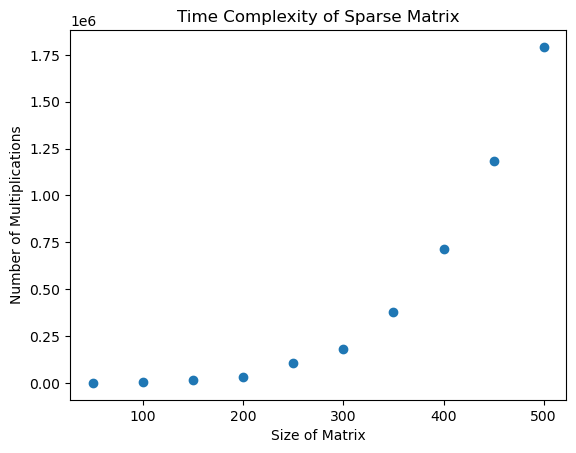

In [12]:
# OUR SPARSE

x = []
y2 = []

for i in range(50, 501, 50):
    x.append(i)
    count, total_time = test(i, SparseMatrix)
    y2.append(count)
    print(i, count)

plt.scatter(x, y2)

plt.xlabel('Size of Matrix')
plt.ylabel('Number of Multiplications')

plt.title('Time Complexity of Sparse Matrix')
    
plt.show()

100 0.007048368453979492
200 0.02198505401611328
300 0.05130815505981445
400 0.0885162353515625
500 0.21636509895324707
600 0.20630884170532227
700 0.2595820426940918
800 0.37140774726867676
900 0.43289613723754883
1000 0.539262056350708
1100 0.6598711013793945
1200 0.7772610187530518
1300 0.9081528186798096
1400 1.0584349632263184
1500 1.1694788932800293
1600 1.3185210227966309
1700 1.5517199039459229
1800 1.7132868766784668
1900 1.8291492462158203
2000 2.138857364654541
2100 2.2593231201171875
2200 2.460265874862671
2300 2.631711006164551
2400 2.9264378547668457
2500 3.1143579483032227
2600 3.3886547088623047
2700 3.681946277618408
2800 3.9358930587768555
2900 4.208936929702759
3000 4.508025884628296
3100 4.811838150024414
3200 5.155794143676758
3300 5.631614923477173
3400 6.102145195007324
3500 6.238756895065308
3600 6.529654026031494
3700 6.8230812549591064
3800 7.42150616645813
3900 7.647021770477295
4000 7.97899603843689


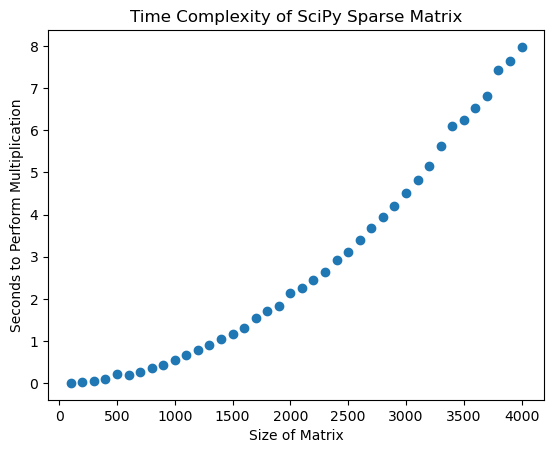

In [23]:
# SCIPY SPARSE

x = []
y3 = []

for i in range(100, 4001, 100):
    x.append(i)
    count, total_time = test(i, scipyMatrix)
    y3.append(total_time)
    print(i, total_time)

plt.scatter(x, y3)

plt.xlabel('Size of Matrix')
plt.ylabel('Seconds to Perform Multiplication')

plt.title('Time Complexity of SciPy Sparse Matrix')
    
plt.show()

50 0.012042999267578125
50 0.03088092803955078
100 0.09392309188842773
100 0.010707855224609375
150 0.7136118412017822
150 0.014653921127319336
200 1.7660789489746094
200 0.02247023582458496
250 137.53213214874268
250 0.0361020565032959
300 27.824551820755005
300 0.04450726509094238
350 70.45568609237671
350 0.06084609031677246
400 423.1599850654602
400 0.09784126281738281


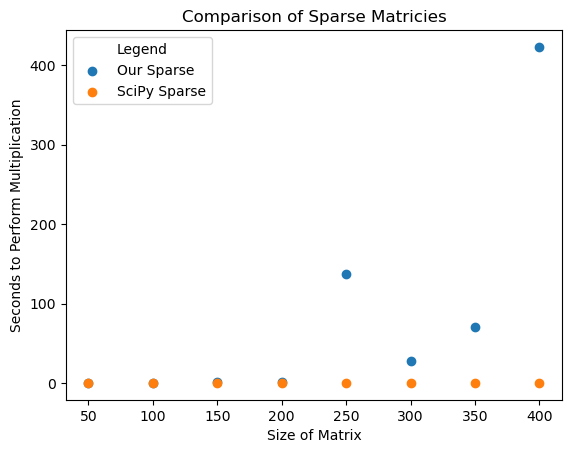

In [100]:
# COMPARISON OF OURS AND SCIPY

x = []
y2 = []
y3 = []
labels = ['Our Sparse', 'SciPy Sparse']

for i in range(50, 401, 50):
    x.append(i)
    our_count, our_total_time = test(i, SparseMatrix)
    y2.append(our_total_time)
    print(i, our_total_time)
    scipy_count, scipy_total_time = test(i, scipyMatrix)
    y3.append(scipy_total_time)
    print(i, scipy_total_time)
    
plt.scatter(x, y2, label=labels[0])
plt.scatter(x, y3, label=labels[1])

plt.xlabel('Size of Matrix')
plt.ylabel('Seconds to Perform Multiplication')

plt.title('Comparison of Sparse Matricies')

plt.legend(title='Legend')

plt.show()

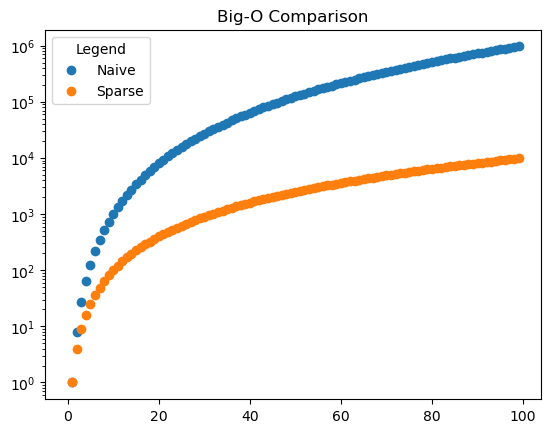

In [53]:
# BIG-O COMPARISON

x = []
y1 = []
y2 = []

labels = ['Naive', 'Sparse']

for i in range(100):
    x.append(i)
    y1.append(i*i*i)
    y2.append(i*i)

plt.yscale("log")  
plt.scatter(x, y1, label=labels[0])
plt.scatter(x, y2, label=labels[1])

plt.title('Big-O Comparison')

plt.legend(title='Legend')

plt.show()